# Generate KG-1 phase diagram from Holland et al. (2018)
## Part 2 : Import MAGEMin output

**This notebook must be run with python**

In [2]:
import pyMelt as m
from pyMelt import phaseDiagramTools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
results = pd.read_csv('table_kg1_holland2018.csv')
results.head()

,P,T,spn_wtpt_O,liq_jdL,spn,liq_kjL,spn_wtpt_FeO,opx,heat_capacity,cpx_cbuf,...,fper,fper_wtpt_O,fper_wtpt_SiO2,fper_wtpt_CaO,fper_wtpt_H2O,fper_wtpt_FeO,fper_per,fper_wtpt_MgO,fper_wtpt_Al2O3,fper_wtpt_K2O
0,0.01,1100.000000,0.640172,0.207057,0.015943,0.074587,29.348605,0.063377,0.244967,0.026177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.01,1105.025126,0.628403,0.207591,0.015526,0.061485,29.111156,0.053854,0.244886,0.026022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.01,1110.050251,0.612519,0.207085,0.014972,0.049939,28.801686,0.041935,0.244059,0.025803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.01,1115.075377,0.591682,0.205492,0.014264,0.040413,28.409315,0.027986,0.242541,0.025510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.01,1120.100503,0.564125,0.202611,0.013365,0.032764,27.917812,0.011851,0.241665,0.025231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Format the data table

Replace thermocalc phase nomenclature with pyMelt nomenclature:

In [4]:
for col in results.columns:
    if col.split('_')[0] == 'ol':
        # print('olv'+col[2:])
        results['olv'+col[2:]] = results[col]
        results.drop(col, axis=1, inplace=True)
    elif col.split('_')[0] == 'g':
        results['grt'+col[1:]] = results[col]
        results.drop(col, axis=1, inplace=True)
    elif col.split('_')[0] == 'fsp':
        results['plg'+col[3:]] = results[col]
        results.drop(col, axis=1, inplace=True)

Remove H2O (which should all be 0):

In [5]:
for col in results.columns:
    if col.split('_')[-1] == 'H2O':
        results.drop(col, axis=1, inplace=True)

Replace O with Fe2O3:

In [6]:
for col in results.columns:
    cs = col.split('_')
    if cs[-1] == 'O':
        results[cs[0] + '_wtpt_FeO'] = (results[cs[0] + '_wtpt_FeO'] / 71.844 - results[cs[0] + '_wtpt_O'] / 15.999 * 2) * 71.844
        results[cs[0] + '_wtpt_Fe2O3'] = results[cs[0] + '_wtpt_O'] / 15.999 * 159.69
        results.drop(col, axis=1, inplace=True)


Relabel temperature and pressure:

In [7]:
results['temperature'] = results['T']
results.drop('T', axis=1, inplace=True)
results['pressure'] = results['P']
results.drop('P', axis=1, inplace=True)

Reorder wtpt labels:

In [8]:
for col in results.columns:
    cs = col.split('_')
    if len(cs) > 1 and cs[1] == 'wtpt':
        results[cs[0] + '_' + cs[2] + '_wtpt'] = results[col]
        results.drop(col, axis=1, inplace=True)

In [9]:
for col in results.columns:
    if col in ['olv', 'cpx', 'opx', 'grt', 'spn', 'plg', 'liq']:
        results[col + '_mass'] = results[col]
        results.drop(col, axis=1, inplace=True)

/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_16429/1063213669.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  results[col + '_mass'] = results[col]
/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_16429/1063213669.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  results[col + '_mass'] = results[col]
/var/folders/s7/7xpdd_k536s0rc_3td0_83780000gp/T/ipykernel_16429/1063213669.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, wh

### Import into pyMelt

In [10]:
grid = phaseDiagramTools.gridsMAGEMin(results)

In [11]:
phasediagram = phaseDiagramTools.phaseDiagram(grid, minerals=['olv', 'cpx', 'opx', 'grt', 'spn', 'plg'])

/Users/sm905/repos/pyMelt/pyMelt/phaseDiagramTools.py:159: RuntimeWarning: invalid value encountered in double_scalars
  y.loc[first_finite_ind - 1] = y.loc[first_finite_ind] + dydx*(x.loc[first_finite_ind - 1] - x.loc[first_finite_ind]) * dfdi_multiplier
/Users/sm905/repos/pyMelt/pyMelt/phaseDiagramTools.py:159: RuntimeWarning: invalid value encountered in double_scalars
  y.loc[first_finite_ind - 1] = y.loc[first_finite_ind] + dydx*(x.loc[first_finite_ind - 1] - x.loc[first_finite_ind]) * dfdi_multiplier
/Users/sm905/repos/pyMelt/pyMelt/phaseDiagramTools.py:167: RuntimeWarning: invalid value encountered in double_scalars
  y.loc[last_finite_ind + 1] = y.loc[last_finite_ind] + dydx*(x.loc[last_finite_ind + 1] - x.loc[last_finite_ind]) * dfdi_multiplier
/Users/sm905/repos/pyMelt/pyMelt/phaseDiagramTools.py:167: RuntimeWarning: invalid value encountered in double_scalars
  y.loc[last_finite_ind + 1] = y.loc[last_finite_ind] + dydx*(x.loc[last_finite_ind + 1] - x.loc[last_finite_ind]) * 

In [12]:
f = open( "kg1_holland2018.p", "wb" )
pickle.dump(phasediagram, f)
f.close()

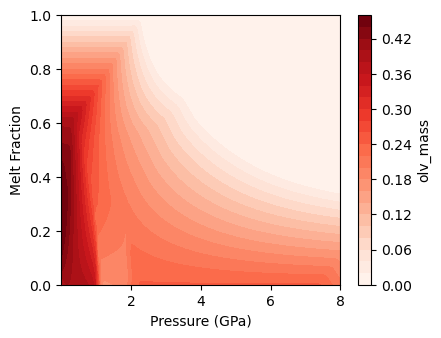

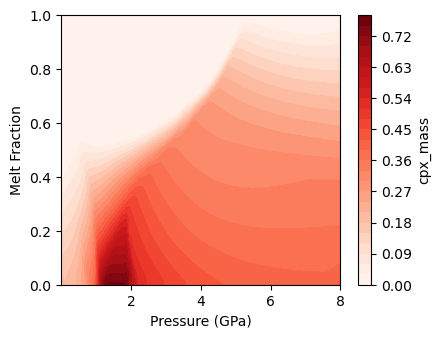

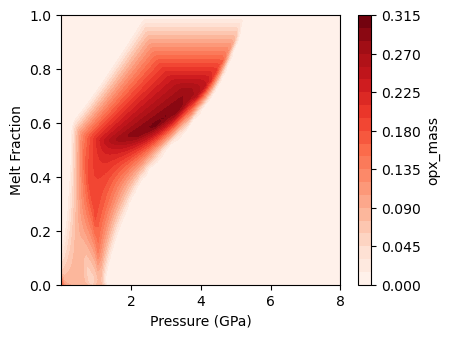

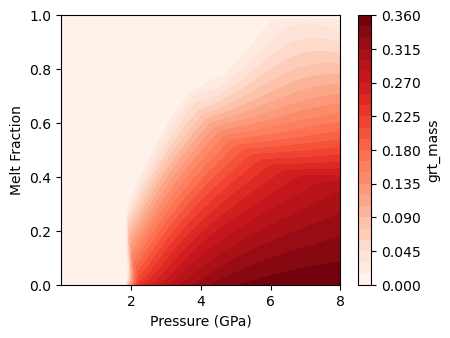

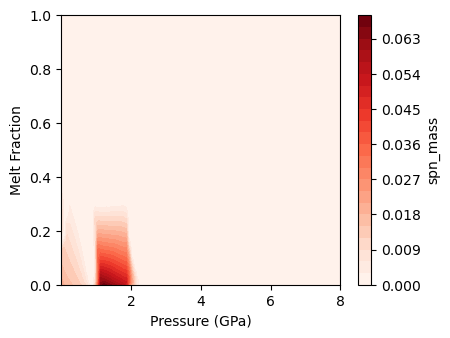

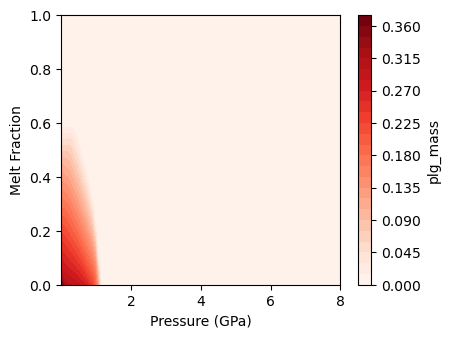

In [13]:
phases = ['olv', 'cpx', 'opx', 'grt', 'spn', 'plg']

for ph in phases:
    f, a = phasediagram.plot_TxSection(ph + '_mass', mask_mineral_out=False)
    plt.show()

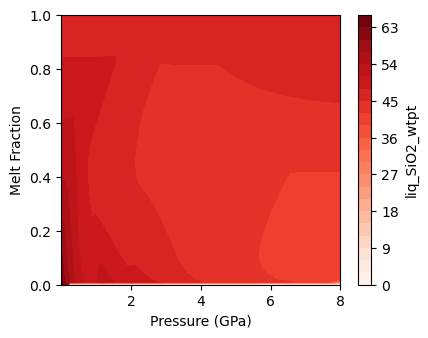

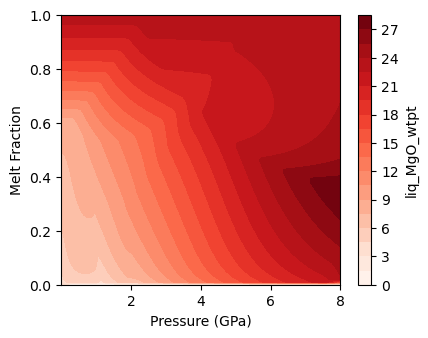

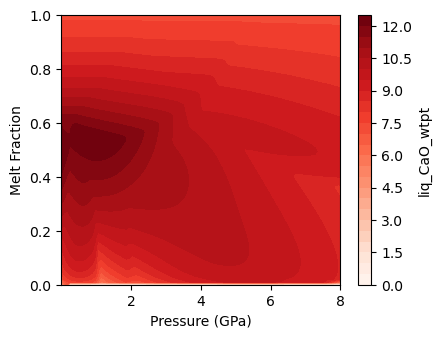

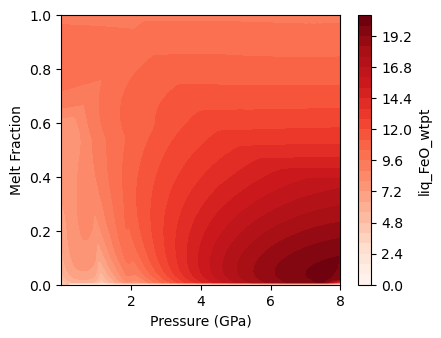

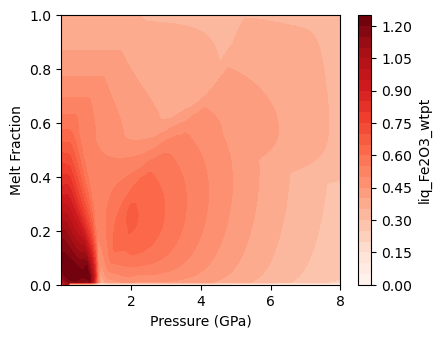

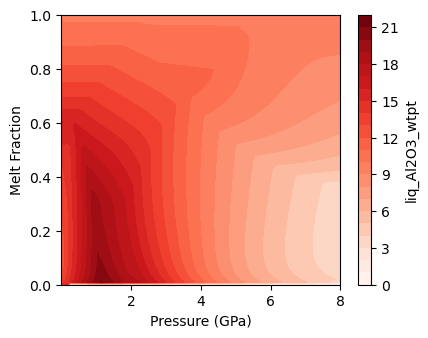

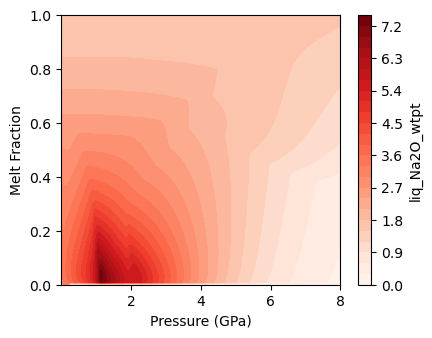

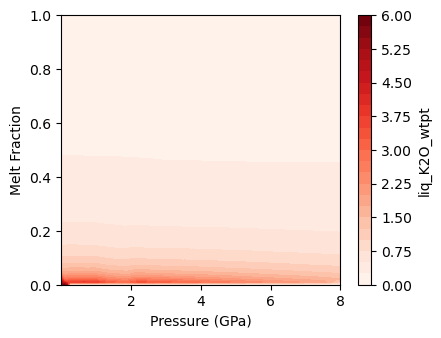

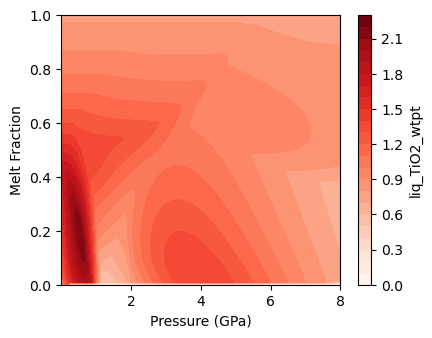

In [14]:
oxides = ['SiO2', 'MgO', 'CaO', 'FeO', 'Fe2O3', 'Al2O3', 'Na2O', 'K2O', 'TiO2']

for ox in oxides:
    f, a = phasediagram.plot_TxSection('liq_' + ox + '_wtpt')
    plt.show()
